In [ ]:
# PRODIGY_DS_03
## Build a Decision Tree Classifier to predict whether a customer will purchase a product or service based on their demographic or behavioural data.
## Dataset is Bank Marketing dataset which contains a zip file from UCI Machine learning Repository.
## It contains 4 excel files which have data in a jumble form.
## First download file and then open in excel and manage the data in columns so that data processing can be formed.
## There are 2 excel files which has same data and remaining 2 also has same data.

# So, let's start and load all files here

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('bank-additional.csv')
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,DAY OF WEEK,...,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,EMP-VAR-RATE,CONS.PRICE.IDX,CONS.CONF.IDX,EURIBOR3m,NR.EMPLOYED,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
df1 = pd.read_csv('bank-additional-full.csv')
df1.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,DAY OF WEEK,...,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,EMP.VAR.RATE,CONS.PRICE.IDX,CONS.CONF.IDX,EURIBOR3m,NR.EMPLOYED,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Now above 2 files have same data so we start to scale and process the data.
## We check info and see if there are null values in these files or not.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             4119 non-null   int64  
 1   JOB             4119 non-null   object 
 2   MARITAL         4119 non-null   object 
 3   EDUCATION       4119 non-null   object 
 4   DEFAULT         4119 non-null   object 
 5   HOUSING         4119 non-null   object 
 6   LOAN            4119 non-null   object 
 7   CONTACT         4119 non-null   object 
 8   MONTH           4119 non-null   object 
 9   DAY OF WEEK     4119 non-null   object 
 10  DURATION        4119 non-null   int64  
 11  CAMPAIGN        4119 non-null   int64  
 12  PDAYS           4119 non-null   int64  
 13  PREVIOUS        4119 non-null   int64  
 14  POUTCOME        4119 non-null   object 
 15  EMP-VAR-RATE    4119 non-null   float64
 16  CONS.PRICE.IDX  4119 non-null   float64
 17  CONS.CONF.IDX   4119 non-null   f

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             41188 non-null  int64  
 1   JOB             41188 non-null  object 
 2   MARITAL         41188 non-null  object 
 3   EDUCATION       41188 non-null  object 
 4   DEFAULT         41188 non-null  object 
 5   HOUSING         41188 non-null  object 
 6   LOAN            41188 non-null  object 
 7   CONTACT         41188 non-null  object 
 8   MONTH           41188 non-null  object 
 9   DAY OF WEEK     41188 non-null  object 
 10  DURATION        41188 non-null  int64  
 11  CAMPAIGN        41188 non-null  int64  
 12  PDAYS           41188 non-null  int64  
 13  PREVIOUS        41188 non-null  int64  
 14  POUTCOME        41188 non-null  object 
 15  EMP.VAR.RATE    41188 non-null  float64
 16  CONS.PRICE.IDX  41188 non-null  float64
 17  CONS.CONF.IDX   41188 non-null 

In [ ]:
# There are no null values in this data so we go ahead and check the columns that they are all same or not.

In [11]:
df.columns

Index(['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'HOUSING', 'LOAN',
       'CONTACT', 'MONTH', 'DAY OF WEEK', 'DURATION', 'CAMPAIGN', 'PDAYS',
       'PREVIOUS', 'POUTCOME', 'EMP-VAR-RATE', 'CONS.PRICE.IDX',
       'CONS.CONF.IDX', 'EURIBOR3m', 'NR.EMPLOYED', 'y'],
      dtype='object')

In [13]:
df1.columns

Index(['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'HOUSING', 'LOAN',
       'CONTACT', 'MONTH', 'DAY OF WEEK', 'DURATION', 'CAMPAIGN', 'PDAYS',
       'PREVIOUS', 'POUTCOME', 'EMP.VAR.RATE', 'CONS.PRICE.IDX',
       'CONS.CONF.IDX', 'EURIBOR3m', 'NR.EMPLOYED', 'y'],
      dtype='object')

In [ ]:
# There is a slight difference in one column name so adjust this

In [15]:
df1 = df1.rename(columns={'EMP.VAR.RATE': 'EMP-VAR-RATE'})
df1.columns

Index(['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'HOUSING', 'LOAN',
       'CONTACT', 'MONTH', 'DAY OF WEEK', 'DURATION', 'CAMPAIGN', 'PDAYS',
       'PREVIOUS', 'POUTCOME', 'EMP-VAR-RATE', 'CONS.PRICE.IDX',
       'CONS.CONF.IDX', 'EURIBOR3m', 'NR.EMPLOYED', 'y'],
      dtype='object')

In [ ]:
# Now combine these two files as they both appears same.

In [17]:
df_combined = pd.concat([df, df1], axis=0)
df_combined = df_combined.reset_index(drop=True)
df_combined

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,MONTH,DAY OF WEEK,...,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,EMP-VAR-RATE,CONS.PRICE.IDX,CONS.CONF.IDX,EURIBOR3m,NR.EMPLOYED,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45302,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
45303,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
45304,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
45305,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [19]:
df_combined.shape

(45307, 21)

In [21]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             45307 non-null  int64  
 1   JOB             45307 non-null  object 
 2   MARITAL         45307 non-null  object 
 3   EDUCATION       45307 non-null  object 
 4   DEFAULT         45307 non-null  object 
 5   HOUSING         45307 non-null  object 
 6   LOAN            45307 non-null  object 
 7   CONTACT         45307 non-null  object 
 8   MONTH           45307 non-null  object 
 9   DAY OF WEEK     45307 non-null  object 
 10  DURATION        45307 non-null  int64  
 11  CAMPAIGN        45307 non-null  int64  
 12  PDAYS           45307 non-null  int64  
 13  PREVIOUS        45307 non-null  int64  
 14  POUTCOME        45307 non-null  object 
 15  EMP-VAR-RATE    45307 non-null  float64
 16  CONS.PRICE.IDX  45307 non-null  float64
 17  CONS.CONF.IDX   45307 non-null 

In [ ]:
# Apply Label Encoder to all object columns 

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['JOB', 'MARITAL', 'EDUCATION','DEFAULT','HOUSING','LOAN','POUTCOME','y']

In [29]:
for column in columns_to_encode:
    df_combined[column] = label_encoder.fit_transform(df_combined[column])

print(df_combined)

       AGE  JOB  MARITAL  EDUCATION  DEFAULT  HOUSING  LOAN    CONTACT MONTH  \
0       30    1        1          2        0        2     0   cellular   may   
1       39    7        2          3        0        0     0  telephone   may   
2       25    7        1          3        0        2     0  telephone   jun   
3       38    7        1          2        0        1     1  telephone   jun   
4       47    0        1          6        0        2     0   cellular   nov   
...    ...  ...      ...        ...      ...      ...   ...        ...   ...   
45302   73    5        1          5        0        2     0   cellular   nov   
45303   46    1        1          5        0        0     0   cellular   nov   
45304   56    5        1          6        0        2     0   cellular   nov   
45305   44    9        1          5        0        0     0   cellular   nov   
45306   74    5        1          5        0        2     0   cellular   nov   

      DAY OF WEEK  ...  CAMPAIGN  PDAYS

In [ ]:
# For Month and Day of Week we use mapping

In [41]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4,
    'fri': 5, 'sat': 6, 'sun': 7
}

In [45]:
df_combined['month_numeric'] = df_combined['MONTH'].map(month_mapping)
df_combined['day_numeric'] = df_combined['DAY OF WEEK'].map(day_mapping)

print(df_combined)

       AGE  JOB  MARITAL  EDUCATION  DEFAULT  HOUSING  LOAN    CONTACT MONTH  \
0       30    1        1          2        0        2     0   cellular   may   
1       39    7        2          3        0        0     0  telephone   may   
2       25    7        1          3        0        2     0  telephone   jun   
3       38    7        1          2        0        1     1  telephone   jun   
4       47    0        1          6        0        2     0   cellular   nov   
...    ...  ...      ...        ...      ...      ...   ...        ...   ...   
45302   73    5        1          5        0        2     0   cellular   nov   
45303   46    1        1          5        0        0     0   cellular   nov   
45304   56    5        1          6        0        2     0   cellular   nov   
45305   44    9        1          5        0        0     0   cellular   nov   
45306   74    5        1          5        0        2     0   cellular   nov   

      DAY OF WEEK  ...  PREVIOUS  POUTC

In [ ]:
# Drop columns like Contact, Month, Day of Week as they are not important any more

In [49]:
df_combined = df_combined.drop(columns=['MONTH','DAY OF WEEK','CONTACT'])
print(df_combined)

       AGE  JOB  MARITAL  EDUCATION  DEFAULT  HOUSING  LOAN  DURATION  \
0       30    1        1          2        0        2     0       487   
1       39    7        2          3        0        0     0       346   
2       25    7        1          3        0        2     0       227   
3       38    7        1          2        0        1     1        17   
4       47    0        1          6        0        2     0        58   
...    ...  ...      ...        ...      ...      ...   ...       ...   
45302   73    5        1          5        0        2     0       334   
45303   46    1        1          5        0        0     0       383   
45304   56    5        1          6        0        2     0       189   
45305   44    9        1          5        0        0     0       442   
45306   74    5        1          5        0        2     0       239   

       CAMPAIGN  PDAYS  PREVIOUS  POUTCOME  EMP-VAR-RATE  CONS.PRICE.IDX  \
0             2    999         0         1     

In [ ]:
# Check the data type of all columns before applying model

In [51]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             45307 non-null  int64  
 1   JOB             45307 non-null  int32  
 2   MARITAL         45307 non-null  int32  
 3   EDUCATION       45307 non-null  int32  
 4   DEFAULT         45307 non-null  int32  
 5   HOUSING         45307 non-null  int32  
 6   LOAN            45307 non-null  int32  
 7   DURATION        45307 non-null  int64  
 8   CAMPAIGN        45307 non-null  int64  
 9   PDAYS           45307 non-null  int64  
 10  PREVIOUS        45307 non-null  int64  
 11  POUTCOME        45307 non-null  int32  
 12  EMP-VAR-RATE    45307 non-null  float64
 13  CONS.PRICE.IDX  45307 non-null  float64
 14  CONS.CONF.IDX   45307 non-null  float64
 15  EURIBOR3m       45307 non-null  float64
 16  NR.EMPLOYED     45307 non-null  float64
 17  y               45307 non-null 

In [ ]:
# Data is ready for model

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
X = df_combined.drop('y', axis=1)
y = df_combined['y']

In [57]:
X

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,EMP-VAR-RATE,CONS.PRICE.IDX,CONS.CONF.IDX,EURIBOR3m,NR.EMPLOYED,month_numeric,day_numeric
0,30,1,1,2,0,2,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,5,5
1,39,7,2,3,0,0,0,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,5,5
2,25,7,1,3,0,2,0,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,6,3
3,38,7,1,2,0,1,1,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,6,5
4,47,0,1,6,0,2,0,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45302,73,5,1,5,0,2,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,11,5
45303,46,1,1,5,0,0,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,11,5
45304,56,5,1,6,0,2,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,11,5
45305,44,9,1,5,0,0,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,11,5


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9013462811741337
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      7940
           1       0.60      0.59      0.60      1122

    accuracy                           0.90      9062
   macro avg       0.77      0.77      0.77      9062
weighted avg       0.90      0.90      0.90      9062



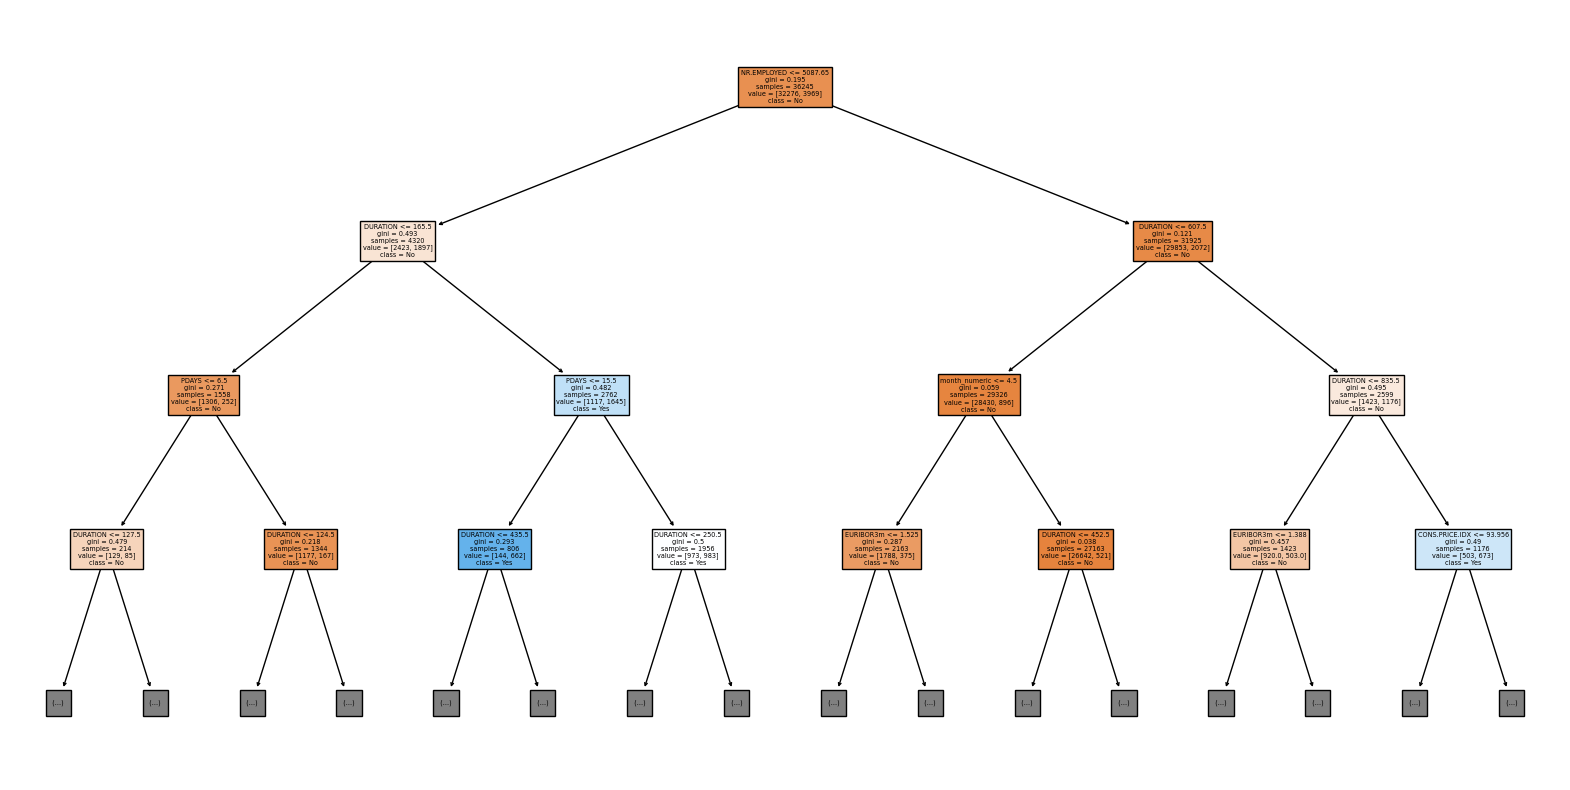

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.show()

In [ ]:
## As seen above 0 has more value as compared to 1 and accuracy is 90% which is good.

In [ ]:
# Now same techniques applied on remaining 2 data sets


In [67]:
df2 = pd.read_csv('bank-full.csv')
df2.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY OF WEEK,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [69]:
df3 = pd.read_csv('bank.csv')
df3.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# As you can see above some columns like Balance and Duration were not present in previous datasets.

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AGE          45211 non-null  int64 
 1   JOB          45211 non-null  object
 2   MARITAL      45211 non-null  object
 3   EDUCATION    45211 non-null  object
 4   DEFAULT      45211 non-null  object
 5   BALANCE      45211 non-null  int64 
 6   HOUSING      45211 non-null  object
 7   LOAN         45211 non-null  object
 8   CONTACT      45211 non-null  object
 9   DAY OF WEEK  45211 non-null  int64 
 10  MONTH        45211 non-null  object
 11  DURATION     45211 non-null  int64 
 12  CAMPAIGN     45211 non-null  int64 
 13  PDAYS        45211 non-null  int64 
 14  PREVIOUS     45211 non-null  int64 
 15  POUTCOME     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [75]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   AGE        4521 non-null   int64 
 1   JOB        4521 non-null   object
 2   MARITAL    4521 non-null   object
 3   EDUCATION  4521 non-null   object
 4   DEFAULT    4521 non-null   object
 5   BALANCE    4521 non-null   int64 
 6   HOUSING    4521 non-null   object
 7   LOAN       4521 non-null   object
 8   CONTACT    4521 non-null   object
 9   DAY        4521 non-null   int64 
 10  MONTH      4521 non-null   object
 11  DURATION   4521 non-null   int64 
 12  CAMPAIGN   4521 non-null   int64 
 13  PDAYS      4521 non-null   int64 
 14  PREVIOUS   4521 non-null   int64 
 15  POUTCOME   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# Note that there are no null values in these data sets
# Now we convert data for model application

In [79]:
df2.columns

Index(['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'BALANCE', 'HOUSING',
       'LOAN', 'CONTACT', 'DAY OF WEEK', 'MONTH', 'DURATION', 'CAMPAIGN',
       'PDAYS', 'PREVIOUS', 'POUTCOME', 'y'],
      dtype='object')

In [81]:
df3.columns

Index(['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'BALANCE', 'HOUSING',
       'LOAN', 'CONTACT', 'DAY', 'MONTH', 'DURATION', 'CAMPAIGN', 'PDAYS',
       'PREVIOUS', 'POUTCOME', 'y'],
      dtype='object')

In [ ]:
# All columns have same name except one so we change it

In [83]:
df3 = df3.rename(columns={'DAY': 'DAY OF WEEK'})
df3.columns

Index(['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'BALANCE', 'HOUSING',
       'LOAN', 'CONTACT', 'DAY OF WEEK', 'MONTH', 'DURATION', 'CAMPAIGN',
       'PDAYS', 'PREVIOUS', 'POUTCOME', 'y'],
      dtype='object')

In [ ]:
# Combine both datasets

In [85]:
df_combined1 = pd.concat([df2, df3], axis=0)
df_combined1 = df_combined1.reset_index(drop=True)
df_combined1

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY OF WEEK,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [87]:
columns_to_encode = ['JOB', 'MARITAL', 'EDUCATION','DEFAULT','HOUSING','LOAN','POUTCOME','y']
for column in columns_to_encode:
    df_combined1[column] = label_encoder.fit_transform(df_combined1[column])

print(df_combined1)

       AGE  JOB  MARITAL  EDUCATION  DEFAULT  BALANCE  HOUSING  LOAN  \
0       58    4        1          2        0     2143        1     0   
1       44    9        2          1        0       29        1     0   
2       33    2        1          1        0        2        1     1   
3       47    1        1          3        0     1506        1     0   
4       33   11        2          3        0        1        0     0   
...    ...  ...      ...        ...      ...      ...      ...   ...   
49727   33    7        1          1        0     -333        1     0   
49728   57    6        1          2        1    -3313        1     1   
49729   57    9        1          1        0      295        0     0   
49730   28    1        1          1        0     1137        0     0   
49731   44    2        2          2        0     1136        1     1   

        CONTACT  DAY OF WEEK MONTH  DURATION  CAMPAIGN  PDAYS  PREVIOUS  \
0       unknown            5   may       261         1     -

In [89]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

In [91]:
df_combined1['month_numeric'] = df_combined1['MONTH'].map(month_mapping)

print(df_combined1)

       AGE  JOB  MARITAL  EDUCATION  DEFAULT  BALANCE  HOUSING  LOAN  \
0       58    4        1          2        0     2143        1     0   
1       44    9        2          1        0       29        1     0   
2       33    2        1          1        0        2        1     1   
3       47    1        1          3        0     1506        1     0   
4       33   11        2          3        0        1        0     0   
...    ...  ...      ...        ...      ...      ...      ...   ...   
49727   33    7        1          1        0     -333        1     0   
49728   57    6        1          2        1    -3313        1     1   
49729   57    9        1          1        0      295        0     0   
49730   28    1        1          1        0     1137        0     0   
49731   44    2        2          2        0     1136        1     1   

        CONTACT  DAY OF WEEK MONTH  DURATION  CAMPAIGN  PDAYS  PREVIOUS  \
0       unknown            5   may       261         1     -

In [ ]:
# We only apply mapping to month because day are already in integer format

In [93]:
df_combined1 = df_combined1.drop(columns=['MONTH','CONTACT'])
print(df_combined1)

       AGE  JOB  MARITAL  EDUCATION  DEFAULT  BALANCE  HOUSING  LOAN  \
0       58    4        1          2        0     2143        1     0   
1       44    9        2          1        0       29        1     0   
2       33    2        1          1        0        2        1     1   
3       47    1        1          3        0     1506        1     0   
4       33   11        2          3        0        1        0     0   
...    ...  ...      ...        ...      ...      ...      ...   ...   
49727   33    7        1          1        0     -333        1     0   
49728   57    6        1          2        1    -3313        1     1   
49729   57    9        1          1        0      295        0     0   
49730   28    1        1          1        0     1137        0     0   
49731   44    2        2          2        0     1136        1     1   

       DAY OF WEEK  DURATION  CAMPAIGN  PDAYS  PREVIOUS  POUTCOME  y  \
0                5       261         1     -1         0        

In [95]:
df_combined1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AGE            49732 non-null  int64
 1   JOB            49732 non-null  int32
 2   MARITAL        49732 non-null  int32
 3   EDUCATION      49732 non-null  int32
 4   DEFAULT        49732 non-null  int32
 5   BALANCE        49732 non-null  int64
 6   HOUSING        49732 non-null  int32
 7   LOAN           49732 non-null  int32
 8   DAY OF WEEK    49732 non-null  int64
 9   DURATION       49732 non-null  int64
 10  CAMPAIGN       49732 non-null  int64
 11  PDAYS          49732 non-null  int64
 12  PREVIOUS       49732 non-null  int64
 13  POUTCOME       49732 non-null  int32
 14  y              49732 non-null  int32
 15  month_numeric  49732 non-null  int64
dtypes: int32(8), int64(8)
memory usage: 4.6 MB


In [97]:
X1 = df_combined1.drop('y', axis=1)
y1 = df_combined1['y']

In [99]:
X1

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,DAY OF WEEK,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,month_numeric
0,58,4,1,2,0,2143,1,0,5,261,1,-1,0,3,5
1,44,9,2,1,0,29,1,0,5,151,1,-1,0,3,5
2,33,2,1,1,0,2,1,1,5,76,1,-1,0,3,5
3,47,1,1,3,0,1506,1,0,5,92,1,-1,0,3,5
4,33,11,2,3,0,1,0,0,5,198,1,-1,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,7,1,1,0,-333,1,0,30,329,5,-1,0,3,7
49728,57,6,1,2,1,-3313,1,1,9,153,1,-1,0,3,5
49729,57,9,1,1,0,295,0,0,19,151,11,-1,0,3,8
49730,28,1,1,1,0,1137,0,0,6,129,4,211,3,1,2


In [101]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [103]:
model.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=42)

In [105]:
y1_pred = model.predict(X1_test)
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Classification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.8879059012767668
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      8796
           1       0.51      0.54      0.53      1151

    accuracy                           0.89      9947
   macro avg       0.73      0.74      0.73      9947
weighted avg       0.89      0.89      0.89      9947



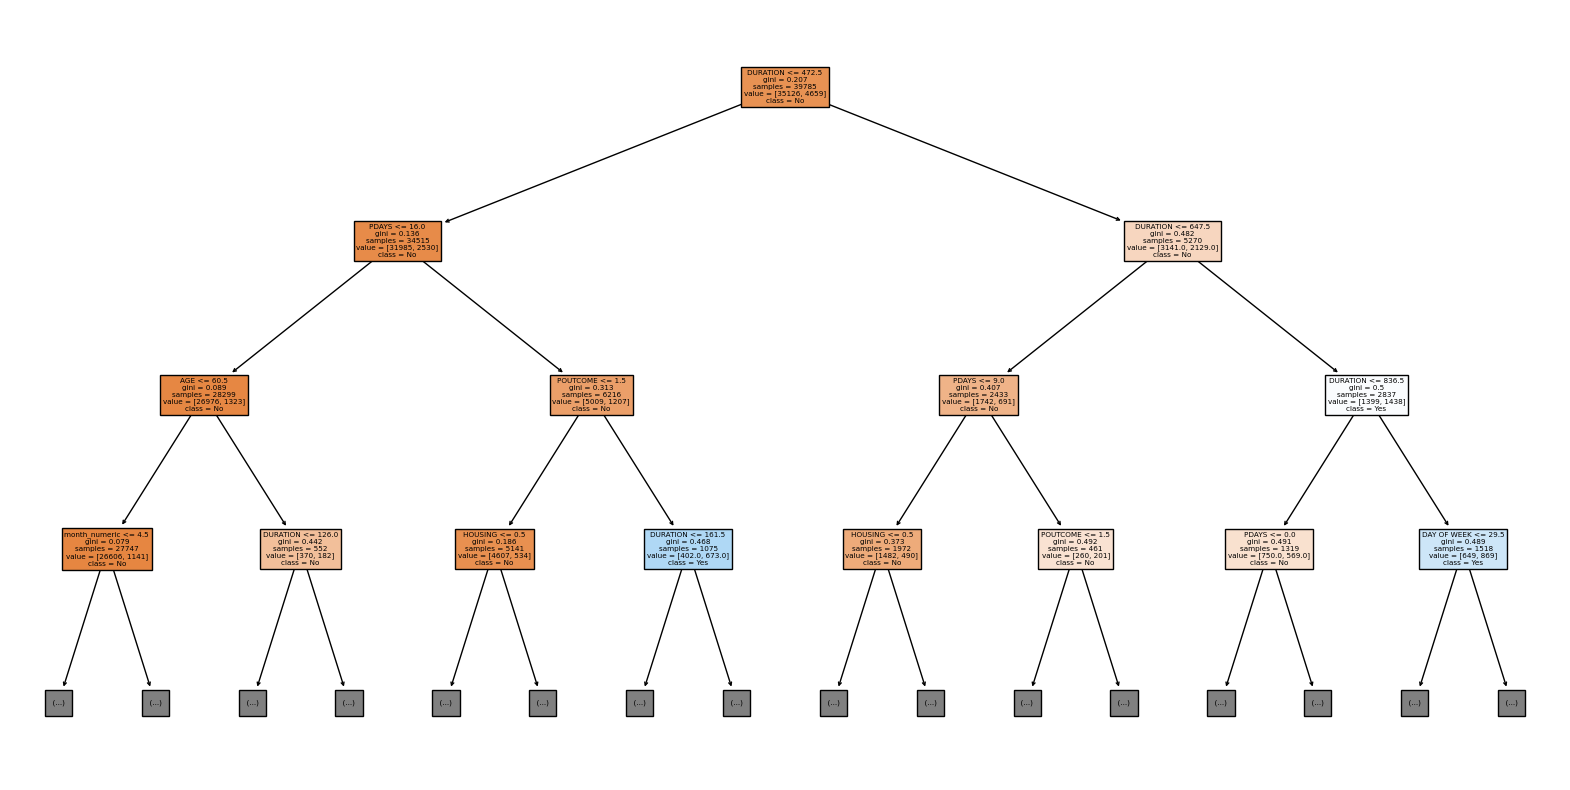

In [107]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X1.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.show()

In [ ]:
# As seen in the model class 0 has high accuracy than class 1 and model accuracy is 88% which is slightly lower than previous tree

In [ ]:
#PRODIGY-DS-03
The task of this project is to predict whether a customer will purchase a product or service based on their features and activities. There are total 4 data sets which include customer details about their Job, Marital, Loan, Balance, Default, Housing and other financial details. As there are data sets with different features Models are concluded separately but aim to predict result combined. 


In [ ]:
#Model 1 Outcome
##	Primary Drivers:
##	Key features influencing the outcome include DURATION (call duration), PDAYS (days since last contact), NR.EMPLOYEES (number of employees), month_numeric (month of the year), EURIBOR3m (three-month Euro Interbank Offered Rate), and CONS_PRICE_IDX (consumer price index).
##	Longer call durations, more recent contact, and certain months lead to more "Yes" classifications. On the other hand, higher economic indicators such as NR.EMPLOYEES and EURIBOR3m tend to correlate with "No" outcomes.
##	Outcome Summary:
##	The model classifies clients as likely to respond "Yes" if recent contact (PDAYS) and longer call durations are present.
##	Economic conditions and certain months (seasonality) play a significant role in determining the likelihood of a positive response.


In [ ]:
#Model 2 Outcome
##	Primary Drivers:
##	Key features in this model are AGE, DURATION (call duration), PDAYS, POUTCOME (previous campaign outcome), HOUSING (housing loan status), and DAY OF WEEK.
##	Clients are more likely to respond "Yes" if they have longer call durations, favorable previous outcomes (POUTCOME), recent contact (PDAYS), and specific days of the week.
##	Factors such as AGE and housing loan status influence the likelihood of a "No" outcome, indicating demographic and financial stability considerations.
##	Outcome Summary:
##	This model classifies clients with recent contact and positive outcomes in previous campaigns as more likely to respond positively.
##	Certain demographic factors like age and loan status contribute to a "No" outcome, indicating these clients may be less receptive.


In [ ]:
#Comparison and Interpretation
##1.	Accuracy: The first model (90.1%) has a slightly higher accuracy compared to the second (88.9%).
##2.	Class 0 Performance: Both models perform well on class 0, with similar precision, recall, and F1-scores around 0.94.
##3.	Class 1 Performance: Class 1 (minority class) is predicted less accurately, with lower precision, recall, and F1-scores in both reports. However, the first model performs slightly better on class 1 (0.60 F1-score) than the second (0.53 F1-score).
##4.	Macro vs. Weighted Average: The macro averages are lower, indicating class imbalance since class 0 has a much higher number of instances.


In [ ]:
#Based on the scores provided in these classification reports, we can summarize the model's performance and its likely behavior in making predictions:
## High Overall Accuracy with Class Imbalance Bias:
##	Both models have high overall accuracy (90.1% in the first report, 88.9% in the second), which primarily reflects their strong performance on the majority class (class 0).
##	However, these accuracy scores might be misleading because class 0 has significantly more instances than class 1. This means the model is biased towards predicting class 0 correctly, leading to high accuracy overall.
##	Strong Performance on Class 0:
##	For class 0, both models have high precision (0.94), recall (0.93–0.95), and F1-scores (0.94). This indicates that the model reliably predicts instances of class 0 with minimal errors.
##	In practical terms, the model is confident and accurate when predicting instances that belong to class 0.
##	Weaker Performance on Class 1:
##	For class 1, both models show lower precision (0.51–0.60), recall (0.54–0.59), and F1-scores (0.53–0.60).This suggests that when the model predicts class 1, it often includes false positives (incorrectly predicting class 1 when it’s actually class 0), leading to lower precision. Additionally, it misses a significant portion of actual class 1 instances (lower recall).


In [ ]:
#	Prediction Behavior:
##	In practice, this model will predict class 0 correctly most of the time, but when it encounters class 1 instances, it may not reliably classify them as such.
##	This prediction behavior indicates that the model is likely to perform well in contexts where correctly predicting class 0 is most important. However, it will likely underperform in situations where identifying class 1 accurately is crucial, as it has a high chance of missing or misclassifying these instances.
